## Verify Python 3

In [1]:
import sys

if sys.version_info[0] < 3:
    raise "Must be using Python 3"
else:
    print("Alrite! We are using Python "+str(sys.version_info[0]))

Alrite! We are using Python 3


## Install OMXWare

In [ ]:
!echo 'y' | pip uninstall omxware

#Install OMXWare client
!pip install --no-cache-dir omxware 

#Install PrettyPrint
!pip install --no-cache-dir pprint

#Install py4j to use Dynamic forms
!pip install --no-cache-dir py4j

#Install panda
!pip install --no-cache-dir pandas

In [3]:
!pip show omxware

Name: omxware
Version: 0.1.27
Summary: Python wrapper for OMXWare REST services to access Data and Files.
Home-page: https://github.ibm.com/GrandChallenge-Almaden/omxware-pypi
Author: Harsha Krishnareddy
Author-email: hvkrishn@us.ibm.com
License: UNKNOWN
Location: /opt/conda/envs/Python36/lib/python3.6/site-packages
Requires: pycrypto, IPython, urllib3, configparser, matplotlib, requests, simplejson, pprint, python-keycloak, pandas
Required-by: 


### Import OMXWare and initialize

In [1]:
%matplotlib inline

import json
import pprint
pp = pprint.PrettyPrinter(indent=4)

from IPython.display import display

import omxware


# --- Authentication options --- #
# generate token with OMXWare user name and password (likely done once and then stored in file, see usage below)
# token = omxware.get_token('username', '<pw>') # fill in password to initiate token

# or

# use previously generated token loaded from file
token_path = "./omxware_collaborative_work/super_awesome_token"  # update for your path to the token file you create
f = open(token_path)
token = f.readline()

# provide your token to authenticate with OMXWare
omx = omxware.omxware(token)

In [3]:
# help(omx)

#### Genomes for Genus: 'Abiotrophia'

In [4]:
# Get Genus object for genus_name = 'abiotrophia'
genus = omx.genus(genus_names='abiotrophia').results()[0]

# Get Genomes for the Genus ^^^^^^^^
genomes_for_genus = genus.genomes()
g4gdf = genomes_for_genus.results(type='df')[['genera','genome_type','id','taxid', 'metadata']]

display(g4gdf)

,genera,genome_type,id,taxid,metadata
0,[abiotrophia],SRA,SRR1922824,46123,"{'biosample': {'strain': 'HMSC24B09', 'access'..."
1,[abiotrophia],SRA,DRR015936,46123,"{'biosample': {'access': 'public', 'sra_id': '..."


### Get Genome by its ID

In [5]:
genome_id = 'SRR1922824'

genome = omx.genomes(ids=genome_id).results()[0]

# For the Genome ^^^^^^^^^^^
id = genome.id()
typ = genome.genome_type()
taxid = genome.taxid()
metadata = genome.metadata('biosample')

genera = genome.genus().results()

print('ID: ' + id)
print('Type: ' + typ)
print('TaxID: ' + taxid)
print('BioSample: ' + str(metadata)[:100])
print('Genera: ' + str(genera))




ID: SRR1922824
Type: SRA
TaxID: 46123
BioSample: {'strain': 'HMSC24B09', 'access': 'public', 'owner_name': 'Washington University, Genome Sequencing 
Genera: [<omxware.entities.Genus.Genus object at 0x1115e5080>]


### Get Genes for a Genome

In [6]:
genes = genome.genes(page_number=1, page_size=10)

### Distribution of Genes by Genera

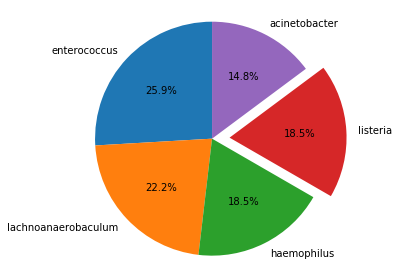

In [7]:
genes.show_facets(name='genera', topN=5)

### Get the Genes

In [8]:
gene_results = genes.results(type='df')
display(gene_results)

,genera,genomes,id,name,omx_creation_ts,omx_modified_ts,sequence_length,type
0,[abiotrophia],[SRR1922824],0cfbebbfc879e543f766a3185ffe45d2,"UDP-N-acetylmuramoyl-L-alanyl-D-glutamate--2,6...",2018-02-28T17:30:33.657Z,2018-02-28T17:30:33.657Z,1491,gene
1,[abiotrophia],[SRR1922824],7ab0cfaaa96a174eaf75c292d1fdcd64,L-fucose isomerase,2018-02-28T17:30:34.779Z,2018-02-28T17:30:34.779Z,1767,gene
2,"[abiotrophia, streptococcus, chlamydia, lachno...","[GCF_000232445.1, ERR829886, ERR264437, ERR106...",fb83e21a8e707f4074c919bc85b8cffd,hypothetical protein,2018-02-13T23:19:12.827Z,2018-02-13T23:19:12.827Z,369,gene
3,[abiotrophia],[SRR1922824],8b9403de60c4f475d13ff4d10dd302da,hypothetical protein,2018-02-28T17:30:33.665Z,2018-02-28T17:30:33.665Z,255,gene
4,[abiotrophia],[SRR1922824],40d07a0c64d0df8a9c4515ba25781acc,hypothetical protein,2018-02-28T17:30:34.227Z,2018-02-28T17:30:34.227Z,231,gene
5,[abiotrophia],[SRR1922824],bfe0bb5dbdfb3c2891d615e2c1a4f9d8,"1,3-beta-galactosyl-N-acetylhexosamine phospho...",2018-02-28T17:30:35.278Z,2018-02-28T17:30:35.278Z,2172,gene
6,[abiotrophia],[SRR1922824],afa8969cd22d97b75dfe5ea0f1e16c6a,Iron uptake system component EfeO,2018-02-28T17:30:33.947Z,2018-02-28T17:30:33.947Z,651,gene
7,[abiotrophia],[SRR1922824],c2a5337f88b671a22ed1eda0fbadb1ed,hypothetical protein,2018-02-28T17:30:35.391Z,2018-02-28T17:30:35.391Z,1071,gene
8,[abiotrophia],[SRR1922824],c2d934fa0b886173dd6463017dd95229,Calcium-transporting ATPase 1,2018-02-28T17:30:35.567Z,2018-02-28T17:30:35.567Z,2673,gene
9,[abiotrophia],[SRR1922824],50652bb950645af9275b5378bc8b6408,Dihydrolipoyl dehydrogenase,2018-02-28T17:30:33.920Z,2018-02-28T17:30:33.920Z,1407,gene


### Get Genes as Fasta

In [9]:
gene_results_fasta = genes.results(type='fasta')
print(gene_results_fasta)

>OMX_gene_0cfbebbfc879e543f766a3185ffe45d2|UDP-N-acetylmuramoyl-L-alanyl-D-glutamate--2,6-diaminopimelate ligase
ATGCAAGTAGAAGACTTACTAAGAGCAGTTCCTAGTGGTCAATTGTATGGCCCAGAAATCAAGGGGGAAATCACGCAACTAGTTAACGATACACGTAACTTAGTGCCTGGTTGTGCCTTTGTTGCCATTAAGGGCCTACAATTTGACGGTCACACTGCTGTGGATCAAGTAGCAGCAGCTGGGGCTAAACTTATGGTGGTAGAAGTCCTGCCTGAAAATTGGCAAGACTACCCATTAAGCTTTTTCTTGGTTCCTTCAACTTTCCGAGCACAAGCCTTGTTAGCTAATCAGTTTTTTGGTCGGCCTACCGAGCATCTTAATGTGGTGGCAGTCACCGGGACTAATGGTAAAACAACCATTTCTAGTCTTATCAGTGATTTGCTCATGCAATTAGGGCATAAGACAGGGCTCATTGGGACCTTACATTATAAGGTGGATCAGACTTATTATCCATCCATCAACACGACGCCCAATGCCTTAGCTCTTCAGCAGTTATTTGCTGAAATGGTATCGGTAGGTTGTCAGGATGCTCTAATTGAAGCTTCTTCTCATGCCTTAGCCTTGGGGCGTCTTTGGGCAACAGATATTGACTGTGCCATCTTCACAAACTTAACTCGGGAGCACTTGGATTTCCATAAAACCATGGAAGGCTATGCCTATGCTAAGTCCTTGCTTTTTGCCCAACTAGGACAAAAGTTTGCGGGAGAGGGGCCAAGACTGGCTATTATCAATGCAGATGACCCTTATGCTTCCATTATGATGCAAGCAACTTCAGCGGATGTTTTGACTTATAGTCTTCAGGATTCTAAAGCCAGTGCCTATGCTGACCAACTAGCGGTTAAGGATGGTAACCAAACCTTCAGACTGCATTATCGCAATCAGACCTA

### Get GO-terms and IPR-codes by Gene

In [10]:
genes = omx.genes(ids='921db25406f80e09c8f78dd915f355aa')
genes = genes.results()

gene = genes[0]
# print(gene)

display(gene.go().results(type='df'))
display(gene.ipr().results(type='df'))

,category,id,name,type
0,BIOLOGICAL_PROCESS,GO:0006807,nitrogen compound metabolic process,go
1,CELLULAR_COMPONENT,GO:0005737,cytoplasm,go
2,MOLECULAR_FUNCTION,GO:0003824,catalytic activity,go
3,BIOLOGICAL_PROCESS,GO:0006542,glutamine biosynthetic process,go
4,BIOLOGICAL_PROCESS,GO:0009399,nitrogen fixation,go
5,MOLECULAR_FUNCTION,GO:0004356,glutamate-ammonia ligase activity,go


,category,description,id,name,type
0,DOMAIN,"Glutamine synthetase, beta-Grasp domain",IPR008147,Gln_synt_b-grasp,ipr
1,CONSERVED_SITE,"Glutamine synthetase class-I, adenylation site",IPR001637,Gln_synth_I_adenylation_site,ipr
2,DOMAIN,"Glutamine synthetase, catalytic domain",IPR008146,Gln_synth_cat_dom,ipr
3,HOMOLOGOUS_SUPERFAMILY,"Glutamine synthetase/guanido kinase, catalytic...",IPR014746,Gln_synth/guanido_kin_cat_dom,ipr
4,CONSERVED_SITE,"Glutamine synthetase, N-terminal conserved site",IPR027302,Gln_synth_N_conserv_site,ipr
5,HOMOLOGOUS_SUPERFAMILY,"Glutamine synthetase, N-terminal domain superf...",IPR036651,Gln_synt_N,ipr
6,FAMILY,Glutamine synthetase type I,IPR004809,Gln_synth_I,ipr
7,CONSERVED_SITE,"Glutamine synthetase, glycine-rich site",IPR027303,Gln_synth_gly_rich_site,ipr


### Get Genome Assembly file

In [12]:
output_file_path = './omxware_collaborative_work/data/getting_started/' + genome.id() + '.txt'
# update above for your file system

genome.file(output_file_path=output_file_path)

'./omxware_collaborative_work/data/getting_started/SRR1922824.txt'

### Get 'biosample' metadata for the Genome

In [25]:
metadata_json = genome.metadata(type='biosample')
print(json.dumps(metadata_json, indent=4, sort_keys=True))

{
    "access": "public",
    "accession": "SAMN03436211",
    "biosample_id": "SAMN03436211",
    "description": "Sample from Abiotrophia sp. HMSC24B09",
    "id": "3436211",
    "isolationsource": "respiratory",
    "last_status_checked": "2016-02-26T17:00:15",
    "last_update": "2016-02-26T17:00:15.160",
    "links": [
        {
            "label": "PRJNA269830",
            "target": "bioproject",
            "type": "entrez",
            "value": {
                "#text": "269830",
                "@label": "PRJNA269830",
                "@target": "bioproject",
                "@type": "entrez"
            }
        }
    ],
    "nathost": "Homo sapiens",
    "organism_name": null,
    "owner_contacts": [
        {
            "email": "lims@genome.wustl.edu"
        }
    ],
    "owner_name": "Washington University, Genome Sequencing Center",
    "package_name": "Generic",
    "publication_date": "2015-03-20T18:05:07.547",
    "sample_name": "462509",
    "sra_id": "SRS878470

In [8]:
# Get Genus object for genus_name = 'abiotrophia'
genus = omx.genus(genus_names='abiotrophia').results()[0]

# Get Genomes for the Genus ^^^^^^^^
genomes_for_genus = genus.genomes()
g4gdf = genomes_for_genus.results(type='df')[['genera','genome_type','id','taxid', 'metadata']]

display(g4gdf)

,genera,genome_type,id,taxid,metadata
0,[abiotrophia],SRA,SRR1922824,46123,"{'biosample': {'strain': 'HMSC24B09', 'access'..."
1,[abiotrophia],SRA,DRR015936,46123,"{'biosample': {'access': 'public', 'sra_id': '..."
